In [242]:
from sklearn.datasets.california_housing import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score

In [19]:
a = fetch_california_housing()

In [20]:
x = a.data[10000]

In [5]:
x

array([   4.2031    ,   13.        ,    6.81111111,    1.01851852,
        752.        ,    2.78518519,   39.02      , -121.08      ])

C:\Users\cywon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


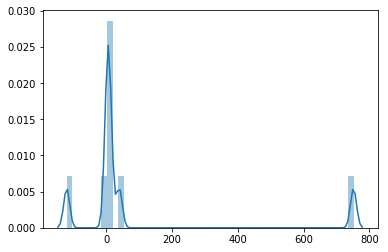

In [6]:
sns.distplot(x)

In [14]:
a.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [15]:
a.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [16]:
a.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

Text(0,0.5,'House(Target) Value')

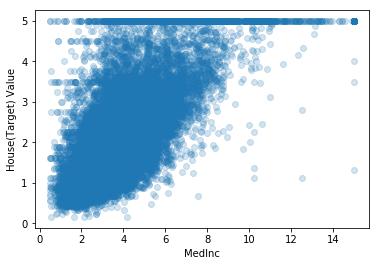

In [31]:
plt.scatter(a.data.T[0],a.target, alpha=0.2)
plt.xlabel(a.feature_names[0])
plt.ylabel("House(Target) Value")

Text(0,0.5,'House(Target) Value')

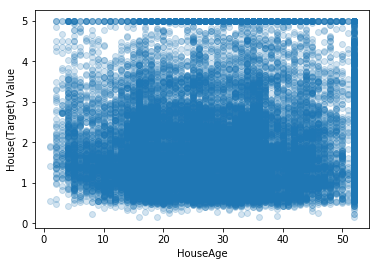

In [32]:
plt.scatter(a.data.T[1],a.target, alpha=0.2)
plt.xlabel(a.feature_names[1])
plt.ylabel("House(Target) Value")

Text(0,0.5,'House(Target Value)')

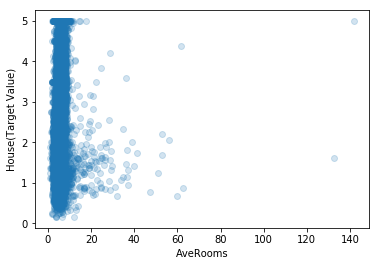

In [33]:
plt.scatter(a.data.T[2],a.target, alpha=0.2)
plt.xlabel(a.feature_names[2])
plt.ylabel("House(Target Value)")

Text(0,0.5,'House(Target Value)')

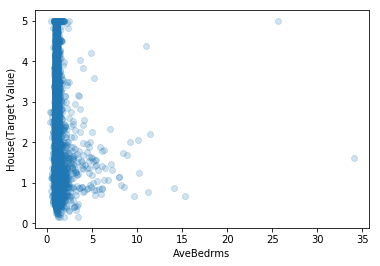

In [34]:
plt.scatter(a.data.T[3],a.target, alpha=0.2)
plt.xlabel(a.feature_names[3])
plt.ylabel("House(Target Value)")

Text(0,0.5,'House(Target Value)')

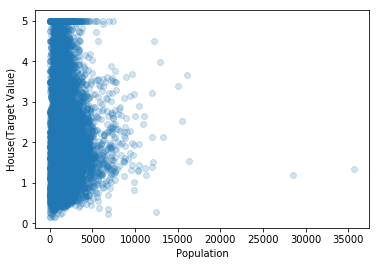

In [35]:
plt.scatter(a.data.T[4],a.target, alpha=0.2)
plt.xlabel(a.feature_names[4])
plt.ylabel("House(Target Value)")

Text(0,0.5,'House(Target Value)')

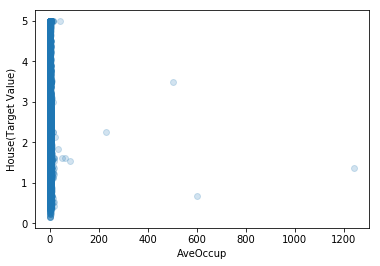

In [36]:
plt.scatter(a.data.T[5],a.target, alpha=0.2)
plt.xlabel(a.feature_names[5])
plt.ylabel("House(Target Value)")

Text(0,0.5,'House(Target Value)')

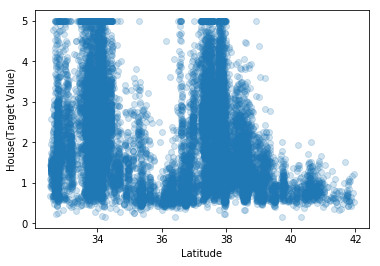

In [37]:
plt.scatter(a.data.T[6],a.target, alpha=0.2)
plt.xlabel(a.feature_names[6])
plt.ylabel("House(Target Value)")

Text(0,0.5,'House(Target Value)')

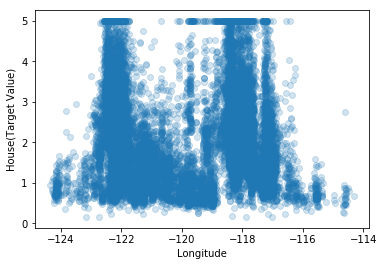

In [38]:
plt.scatter(a.data.T[7],a.target, alpha=0.2)
plt.xlabel(a.feature_names[7])
plt.ylabel("House(Target Value)")

### Split bewteen Train and Test

In [126]:
X_train,X_test,y_train,y_test = train_test_split(a.data,a.target,test_size=0.2,random_state=1)

In [127]:
scaled_X_Train = StandardScaler().fit_transform(X_train,y_train)

In [147]:
scaled_X_Test = StandardScaler().fit_transform(X_test,y_test)

In [165]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1,0.1,0.01,0.001,0.0001,0]}

##### Linear Regression

In [129]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

In [130]:
reg.score(X_test,y_test)

0.5965968374812282

In [131]:
reg2 = linear_model.LinearRegression().fit(scaled_X_Train, y_train)

In [132]:
reg2.score(scaled_X_Test,y_test)

0.6006479957183422

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

TypeError: __init__() missing 2 required positional arguments: 'estimator' and 'param_grid'

##### Ridge Regression

In [133]:
ridge = linear_model.Ridge().fit(X_train,y_train)

In [134]:
ridge.score(X_test,y_test)

0.5965957761160678

In [135]:
ridge2 = linear_model.Ridge().fit(scaled_X_Train,y_train)

In [136]:
ridge2.score(scaled_X_Test,y_test)

0.6006693287643367

In [185]:
linear_model.Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

Grid Search

In [188]:
params = linear_model.Ridge().get_params()

In [228]:
alphasRidge = np.array([1,0.1,0.01,0.001,0.0001,0])

In [194]:
grid_ridge = GridSearchCV(linear_model.Ridge(),param_grid=dict(alpha=alphasRidge)).fit(X_train,y_train)

In [195]:
grid_ridge.score(X_test,y_test)

0.5965957761160678

##### Lasso

In [219]:
lasso = linear_model.Lasso().fit(X_train,y_train)

In [220]:
lasso.score(X_test,y_test)

0.28974656814248256

In [221]:
lasso2 = linear_model.Lasso().fit(scaled_X_Train,y_train)

In [222]:
lasso2.score(scaled_X_Test,y_test)

-0.0014734336890012134

Grid Search

In [223]:
linear_model.Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [224]:
alphasLasso = np.array([.001,.01,.1,1,10,100])

In [225]:
grid_lasso= GridSearchCV(linear_model.Lasso(),param_grid=dict(alpha=alphasLasso)).fit(X_train,y_train)

In [226]:
grid_lasso.score(X_test,y_test)

0.5965554607602339

##### ElasticNet

In [141]:
elasticNet = linear_model.ElasticNet().fit(X_train,y_train)

In [142]:
elasticNet.score(X_test,y_test)

0.42716789580749576

In [122]:
elasticNet2 = linear_model.ElasticNet().fit(scaled_X_Train,y_train)

In [123]:
elasticNet2.score(scaled_X_Test,y_test)

0.2055765133622394

Grid Search

In [216]:
grid_elasticNet = GridSearchCV(linear_model.ElasticNet(),param_grid=dict(alpha=alphasLasso)).fit(X_train,y_train)

In [217]:
grid_elasticNet.score(X_test,y_test)

0.5965668648881861

## Q4

In [246]:
ridgeCVChanges = {}
for x in range(5):
    grid_ridge = GridSearchCV(linear_model.Ridge(),param_grid=dict(alpha=alphasRidge),cv=x+2).fit(X_train,y_train)
    ridgeCVChanges[x+2] = grid_ridge.score(X_test,y_test)

In [239]:
lassoCVChanges = {}
for x in range(5):
    grid_lasso = GridSearchCV(linear_model.Lasso(),param_grid=dict(alpha=alphasLasso),cv=x+2).fit(X_train,y_train)
    lassoCVChanges[x+2] = grid_lasso.score(X_test,y_test)

In [263]:
elasticNetCVChanges = {}
for x in range(5):
    grid_elasticNet = GridSearchCV(linear_model.ElasticNet(),param_grid=dict(alpha=alphasLasso)).fit(X_train,y_train)
    elasticNetCVChanges[x+2] = grid_elasticNet.score(X_test,y_test)

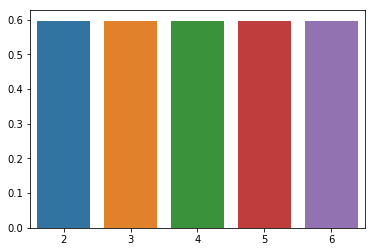

In [264]:
sns.barplot(list(ridgeCVChanges.keys()),list(ridgeCVChanges.values()))

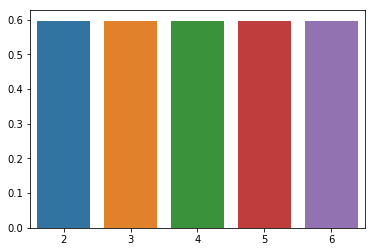

In [265]:
sns.barplot(list(lassoCVChanges.keys()),list(lassoCVChanges.values()))

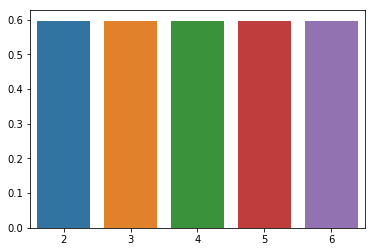

In [266]:
sns.barplot(list(elasticNetCVChanges.keys()),list(elasticNetCVChanges.values()))

## Q5

NameError: name 'fit' is not defined